We need to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.  

We don’t really know if there are other differences between the customers in each group, so
anything you can tell us would be really helpful to give some context to what went well.

## About Pens and Printers
Pens and Printers was founded in 1984 and provides high quality office products to large
organizations. We are a trusted provider of everything from pens and notebooks to desk
chairs and monitors. We don’t produce our own products but sell those made by other
companies.  

We have built long lasting relationships with our customers and they trust us to provide them
with the best products for them. As the way in which consumers buy products is changing,
our sales tactics have to change too. Launching a new product line is expensive and we need
to make sure we are using the best techniques to sell the new product effectively. The best
approach may vary for each new product so we need to learn quickly what works and what
doesn’t.

## New Product Sales Methods
Six weeks ago we launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.  

Our focus has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.

**Email**: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.  

**Call**: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.  

**Email and call**: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.


# Data Information
The sales rep has pulled some data from their sales tracking system for us. They haven’t
included numbers for how much time was spent on each customer, but there may be some
other useful customer information in here.  

The data only relates to the new products sold. As there are multiple different products, the
revenue will vary depending on which products were sold.  

You can find the data here. I will let you decide how to process it, just make sure you include
all your decisions in your report.  

The data hasn’t been validated, so make sure that you check it against all of the information
in the table before you start your analysis.

| Column Name         | Details                                                                 |
|---------------------|-------------------------------------------------------------------------|
| week                | Week sale was made, counted as weeks since product launch               |
| sales_method        | Character, which of the three sales methods were used for that customer |
| customer_id         | Character, unique identifier for the customer                           |
| nb_sold             | Numeric, number of new products sold                                    |
| revenue             | Numeric, revenue from the sales, rounded to 2 decimal places            |
| years_as_customer   | Numeric, number of years customer has been buying from us (company founded in 1984) |
| nb_site_visits      | Numeric, number of times the customer has visited our website in the last 6 months |
| state               | Character, location of the customer i.e. where orders are shipped       |

# Written Report  
Your written report should include written text summaries and graphics of the following:  
* Data validation:  
** Describe validation and cleaning steps for every column in the data  
* Exploratory Analysis to answer the customer questions ensuring you include:  
** Two different types of graphic showing single variables only  
** At least one graphic showing two or more variables  
** Description of your findings  
* Definition of a metric for the business to monitor  
** How should the business monitor what they want to achieve?  
** Estimate the initial value(s) for the metric based on the current data?  
* Final summary including recommendations that the business should undertake  

In [15]:
# import modules
import pandas as pd
import seaborn as sns

In [2]:
# import data
raw = pd.read_csv('product_sales.csv')

# display
raw.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
# check for missing values per column
raw.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [4]:
# impute missing revenue values with the mean
prep_no_missing = raw.copy()
prep_no_missing['revenue'] = prep_no_missing['revenue'].fillna(prep_no_missing['revenue'].mean())

# check for missing values per column
prep_no_missing.isnull().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [5]:
# check unique values in sales_method and state
print(prep_no_missing['sales_method'].unique())
print(prep_no_missing['state'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


In [6]:
# make string value lowercase
prep_clean_str = prep_no_missing.copy()
prep_clean_str['sales_method'] = prep_clean_str['sales_method'].str.lower()
prep_clean_str['state'] = prep_clean_str['state'].str.lower()

# validate string value
prep_clean_str['sales_method'] = prep_clean_str['sales_method'].replace('em + call', 'email + call')

# check unique values in sales_method and state
print(prep_clean_str['sales_method'].unique())
print(prep_clean_str['state'].unique())

['email' 'email + call' 'call']
['arizona' 'kansas' 'wisconsin' 'indiana' 'illinois' 'mississippi'
 'georgia' 'oklahoma' 'massachusetts' 'missouri' 'texas' 'new york'
 'maryland' 'california' 'tennessee' 'pennsylvania' 'north dakota'
 'florida' 'michigan' 'north carolina' 'hawaii' 'colorado' 'louisiana'
 'virginia' 'new mexico' 'arkansas' 'alaska' 'oregon' 'new hampshire'
 'ohio' 'new jersey' 'connecticut' 'iowa' 'montana' 'washington'
 'kentucky' 'alabama' 'nebraska' 'south carolina' 'minnesota'
 'south dakota' 'delaware' 'maine' 'utah' 'west virginia' 'vermont'
 'rhode island' 'nevada' 'idaho' 'wyoming']


In [7]:
# check for invalid years_as_customer
invalid_years_as_customer = (2025 - prep_clean_str['years_as_customer'] < 1984)
prep_clean_str[invalid_years_as_customer]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,california
13800,4,call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,california


In [8]:
# remove rows with invalid years_as_customer
prep_clean_years_as_customer = prep_clean_str.copy()
prep_clean_years_as_customer = prep_clean_years_as_customer[~invalid_years_as_customer]

# check for invalid years_as_customer
prep_clean_years_as_customer[invalid_years_as_customer]

C:\Users\User\AppData\Local\Temp\ipykernel_12996\1364868925.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prep_clean_years_as_customer[invalid_years_as_customer]


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [9]:
# check for negative numeric values
negative_values = prep_clean_years_as_customer._get_numeric_data().lt(0).sum()
negative_values

week                 0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
dtype: int64

In [10]:
# describe the data
cleaned = prep_clean_years_as_customer.copy()
cleaned.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,14998.00000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.09828,10.084678,93.937622,4.959261,24.990799
std,1.65649,1.812334,45.707135,5.011237,3.501100
min,1.00000,7.000000,32.540000,0.000000,12.000000
25%,2.00000,9.000000,53.042500,1.000000,23.000000
50%,3.00000,10.000000,91.865000,3.000000,25.000000
75%,5.00000,11.000000,106.070000,7.000000,27.000000
max,6.00000,16.000000,238.320000,39.000000,41.000000


In [12]:
# describe email only method
email_only = cleaned[cleaned['sales_method'] == 'email']
email_only.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,7465.000000,7465.000000,7465.000000,7465.000000,7465.000000
mean,2.469123,9.729270,96.895006,4.976021,24.754454
std,1.485060,1.179374,10.826850,5.033525,3.281760
min,1.000000,8.000000,78.830000,0.000000,13.000000
25%,1.000000,9.000000,88.390000,1.000000,23.000000
50%,2.000000,10.000000,94.270000,3.000000,25.000000
75%,4.000000,11.000000,104.460000,7.000000,27.000000
max,6.000000,15.000000,148.970000,39.000000,37.000000


In [13]:
# describe call only method
call_only = cleaned[cleaned['sales_method'] == 'call']
call_only.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,3.426325,9.509575,49.287491,5.168313,24.423302
std,1.564946,1.734017,12.121708,5.089530,3.600041
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,8.000000,41.630000,1.000000,22.000000
50%,4.000000,10.000000,49.930000,4.000000,24.000000
75%,5.000000,11.000000,52.980000,7.000000,27.000000
max,6.000000,14.000000,93.934943,38.000000,41.000000


In [14]:
# describe email + call method
email_call = cleaned[cleaned['sales_method'] == 'email + call']
email_call.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,2572.000000,2572.000000,2572.000000,2572.000000,2572.000000
mean,4.291602,12.225505,171.477444,4.507387,26.771384
std,1.448090,1.931459,40.931708,4.760987,3.357916
min,1.000000,8.000000,93.934943,0.000000,14.000000
25%,3.000000,10.000000,149.822500,1.000000,25.000000
50%,5.000000,12.000000,182.135000,3.000000,27.000000
75%,5.000000,13.000000,189.535000,6.000000,29.000000
max,6.000000,16.000000,238.320000,39.000000,37.000000


<Axes: xlabel='sales_method', ylabel='revenue'>

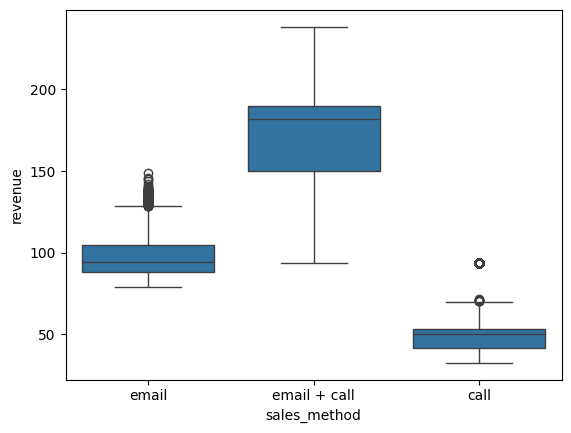

In [16]:
# boxplot of revenue by sales method
sns.boxplot(x='sales_method', y='revenue', data=cleaned)

<Axes: xlabel='sales_method', ylabel='count'>

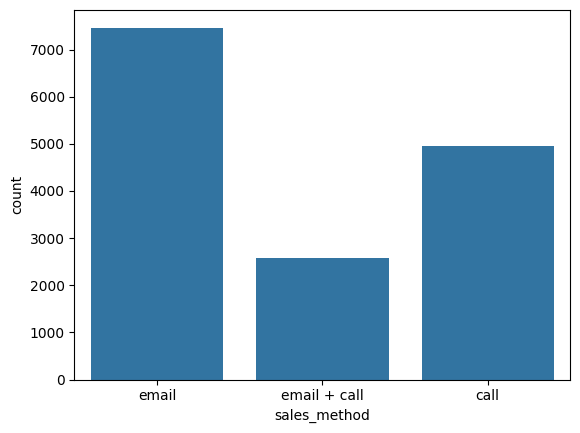

In [18]:
# barplot of customers by method
sns.countplot(x='sales_method', data=cleaned)

<Axes: xlabel='week', ylabel='revenue'>

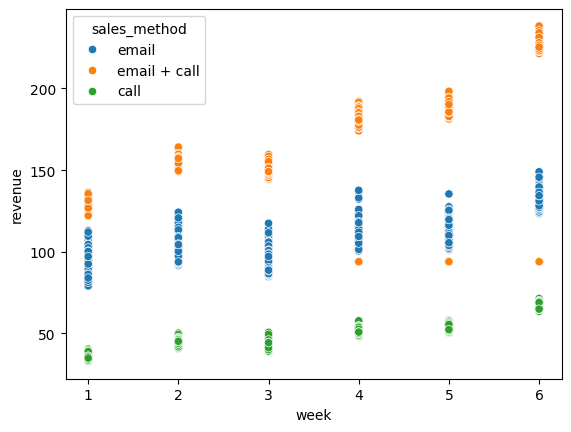

In [20]:
# scatter plot of revenue by weaks per method
sns.scatterplot(x='week', y='revenue', hue='sales_method', data=cleaned)

<Axes: xlabel='sales_method', ylabel='sales_method'>

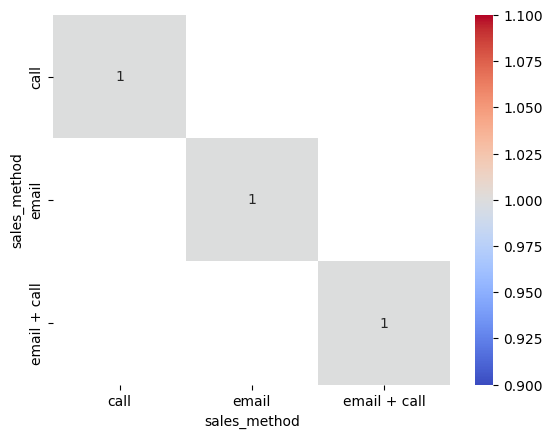

In [27]:
# correlation matrix of revenue per method
revenue_corr = cleaned.pivot_table(index='customer_id', columns='sales_method', values='revenue').corr()
sns.heatmap(revenue_corr, annot=True, cmap='coolwarm')